#### College of Computing and Informatics, Drexel University
#### INFO 213: Data Science Programming II, Summer 2019
---------------------------------------------------------------

###  Project Title: UK Accidents 2012-2015
### Student: Hong Son
#### Date: 7/22/19
---------------------------------------------------------------

In [1]:
# Write your code below

import matplotlib.pyplot as plt
import matplotlib.cm

from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

import matplotlib.pyplot as plt
import matplotlib.cm
 
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import seaborn as sns 

import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt

In [2]:
accidents = pd.read_csv('accidents2012_2015.csv')

In [3]:
accidents['Year'] = pd.DatetimeIndex(accidents['Date']).year  


In [4]:
accidents.shape

(570609, 33)

In [5]:
accidents.tail()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
570604,2015984139115,312087.0,570791.0,-3.376671,55.023855,98,3,3,1,11/12/2015,...,0,1,1,2,0,0,2,1,NaN,2015
570605,2015984139715,320671.0,569791.0,-3.242159,55.016316,98,3,2,1,02/12/2015,...,0,1,1,2,0,0,2,1,NaN,2015
570606,2015984140215,311731.0,586343.0,-3.387067,55.163502,98,2,1,4,23/12/2015,...,0,6,4,2,0,0,2,1,NaN,2015
570607,2015984140515,328273.0,570137.0,-3.123385,55.020580,98,3,3,3,26/12/2015,...,0,1,2,2,0,0,2,1,NaN,2015
570608,2015984141415,314050.0,579638.0,-3.348646,55.103676,98,3,13,7,31/12/2015,...,0,6,3,4,0,0,2,1,NaN,2015


# 2. Meaning and Data Type


In [6]:
# Print column and the types
for accident in accidents:
    d_type = accidents[accident].dtype
    print("Column: ", accident , " : ",d_type)    

Column:  Accident_Index  :  object
Column:  Location_Easting_OSGR  :  float64
Column:  Location_Northing_OSGR  :  float64
Column:  Longitude  :  float64
Column:  Latitude  :  float64
Column:  Police_Force  :  int64
Column:  Accident_Severity  :  int64
Column:  Number_of_Vehicles  :  int64
Column:  Number_of_Casualties  :  int64
Column:  Date  :  object
Column:  Day_of_Week  :  int64
Column:  Time  :  object
Column:  Local_Authority_(District)  :  int64
Column:  Local_Authority_(Highway)  :  object
Column:  1st_Road_Class  :  int64
Column:  1st_Road_Number  :  int64
Column:  Road_Type  :  int64
Column:  Speed_limit  :  int64
Column:  Junction_Detail  :  int64
Column:  Junction_Control  :  int64
Column:  2nd_Road_Class  :  int64
Column:  2nd_Road_Number  :  int64
Column:  Pedestrian_Crossing-Human_Control  :  int64
Column:  Pedestrian_Crossing-Physical_Facilities  :  int64
Column:  Light_Conditions  :  int64
Column:  Weather_Conditions  :  int64
Column:  Road_Surface_Conditions  :  int64

In total, there are 33 columns. <br>
1. <ul> <b> <u> Accident_index:</u> </b> string - The unique id of the accident </ul> <br>
2. <ul> <b> <u> Location_Easting_OSGR: </u> </b> Numeric - Local British Coordinates x value </ul> <br>
3. <ul> <b> <u> Location_Northing_OSGR: </u> </b> Numeric - Local British Coordinates y value </ul> <br>
4. <ul> <b> <u>Longitude: </u> </b> Numeric - Longitude that accident happend </ul> <br>
5. <ul> <b> <u> Latitude: </u> </b> Numeric - Latitude that accident happend </ul> <br>
6. <ul> <b> <u> Police_Force: </u> </b> Numeric - Identifier of police force </ul> <br>
7. <ul> <b> <u> Accident_Serverity: </u> </b> Numeric - The severity of the accident. Based on 3 categories (1 = Fatal, 2 = Serious, 3 = Slight) </ul> <br>
8. <ul> <b> <u> Number_of_Vehicles: </u> </b> Numeric - Number of vehicles involved in the accident </ul> <br>

9. <ul> <b> <u> Number_of_Casualties: </u> </b> Numeric - Number of casualties (injuries) from accident </ul> <br>

10. <ul> <b> <u> Date: </u> </b> date - Date the accident happened  </ul> <br>

11. <ul> <b> <u> Day_of_Week: </u> </b> numeric - Day the accident happened (1- 7)(Sunday-Sat) </ul> <br>

12. <ul> <b> <u> Time: </u> </b> Date - the accident was reported, in UTC+0. </ul> <br>

13. <ul> <b> <u> Local_Authority_(District):</u> </b> Numeric - District number of local authority </ul> <br>

14. <ul> <b> <u> Local_Authority_(Highway): </u> </b> Numeric - Highway number of local authority </ul> <br>

15. <ul> <b> <u>1st_Road_Class: </u> </b> Numeric - This field is only used for junctions. </ul> <br>

16. <ul> <b> <u> 1st_Road_Number: </u> </b> Numeric - This field is only used for junctions. </ul> <br>

17. <ul> <b> <u> Road_TypeSome: </u> </b> string - options are Roundabout, One Way, Dual Carriageway, Single Carriageway, Slip Road, Unknown. </ul> <br>

18. <ul> <b> <u> Speed_limit: </u> </b> numeric - speed limit for road </ul> <br>

19. <ul> <b> <u> Junction_Detail: </u> </b> string - Some options are Crossroads, Roundabouts, Private Roads, Not a Junction. </ul> <br>

20. <ul> <b> <u> Junction_Control: </u> </b> string - A person, a type of sign, automated, etc. </ul> <br>

21. <ul> <b> <u> 2nd_Road_Class: </u> </b> Numeric - This field is only used for junctions. </ul> <br>

22. <ul> <b> <u> 2nd_Road_Number: </u> </b> Numeric - This field is only used for junctions. </ul> <br>

23. <ul> <b> <u> Pedestrian_Crossing-Human_Control: </u> </b> string - Was there a human controller and what type? </ul> <br>

24. <ul> <b> <u> Pedestrian_Crossing-Physical_Facilities: </u> </b> string - Was it a zebra crossing, or bridge, or another type? </ul> <br>

25. <ul> <b> <u> Light_Conditions: </u> </b> string - Day, night, street lights or not. </ul> <br>

26. <ul> <b> <u> Weather_Conditions: </u> </b> string - Wind, rain, snow, fog. </ul> <br>

27. <ul> <b> <u> Road_Surface_Conditions: </u> </b> string - Wet, snow, ice, flood. </ul> <br>

28. <ul> <b> <u> Special_Conditions_at_Site: </u> </b> string - Was anything broken or defective, e.g. an obscured sign? </ul> <br>

29. <ul> <b> <u> Carriageway_Hazards: </u> </b> string - Was something in the way, e.g. a pedestrian, another accident, something in the road? </ul> <br>

30. <ul> <b> <u> Urban_or_Rural_Area: </u> </b> string - Was it in the urban or rural area </ul> <br>

31. <ul> <b> <u> Did_Police_Officer_Attend_Scene_of_Accident: </u> </b> string - did officer attend scene </ul> <br>

32. <ul> <b> <u> LSOA_of_Accident_Location: </u> </b> string - Lower Layer Super Output Area is a geographical location surrogate for latitude and longitude </ul> <br>

33. <ul> <b> <u> Year: </u> </b> numeric - Year of the accident </ul> <br>

# 3. Data Cleansing

In [7]:
accidents[accidents == -1] = np.nan


In [8]:
print("There are " + str(len(accidents)-len(accidents.drop_duplicates(keep=False))) + " duplicates.")


There are 0 duplicates.


In [9]:
accidents = accidents.drop_duplicates(keep=False)


In [10]:
#accidents[accidents['Time'].isnull()]


In [11]:
# Print number of missing values in each column
for accident in accidents:
    value = accidents[accident].isnull().sum()
    if (value>0):
        print("There are", value, " missing values in column",accident)
#         print("'"+ accident+ "',")


There are 27  missing values in column Location_Easting_OSGR
There are 27  missing values in column Location_Northing_OSGR
There are 27  missing values in column Longitude
There are 27  missing values in column Latitude
There are 31  missing values in column Time
There are 9  missing values in column Junction_Detail
There are 223675  missing values in column Junction_Control
There are 227290  missing values in column 2nd_Road_Class
There are 4045  missing values in column 2nd_Road_Number
There are 140  missing values in column Pedestrian_Crossing-Human_Control
There are 127  missing values in column Pedestrian_Crossing-Physical_Facilities
There are 1026  missing values in column Road_Surface_Conditions
There are 108  missing values in column Special_Conditions_at_Site
There are 98  missing values in column Carriageway_Hazards
There are 9  missing values in column Did_Police_Officer_Attend_Scene_of_Accident
There are 37615  missing values in column LSOA_of_Accident_Location


In [12]:
# Look at where Time is nan
# accidents[accidents['Time'].isna() == True].Light_Conditions.value_counts()

# Get value of the frequent time
daylight = accidents[accidents['Light_Conditions'] == 1].Time.value_counts().index[0]
darkness = accidents[accidents['Light_Conditions'] == 4].Time.value_counts().index[0]
darkness_unlit = accidents[accidents['Light_Conditions'] == 5].Time.value_counts().index[0]
darkness_no_light = accidents[accidents['Light_Conditions'] == 6].Time.value_counts().index[0]
darkness_unknown = accidents[accidents['Light_Conditions'] == 7].Time.value_counts().index[0]


mask = (accidents['Light_Conditions'] == 1) 
mask2 = (accidents['Light_Conditions'] == 4) 
mask3 = (accidents['Light_Conditions'] == 5) 
mask4 = (accidents['Light_Conditions'] == 6) 
mask5 = (accidents['Light_Conditions'] == 7) 

accidents.loc[accidents['Time'].isnull() & mask, 'Time'] = daylight
accidents.loc[accidents['Time'].isnull() & mask2, 'Time'] = darkness
accidents.loc[accidents['Time'].isnull() & mask3, 'Time'] = darkness_unlit
accidents.loc[accidents['Time'].isnull() & mask4, 'Time'] = darkness_no_light
accidents.loc[accidents['Time'].isnull() & mask5, 'Time'] = darkness_unknown


In [13]:
# Same for the Road_Surface_Conditions

accidents[accidents['Road_Surface_Conditions'].isna() == True].Weather_Conditions.value_counts()


unknown = accidents[accidents['Weather_Conditions'] == 9].Road_Surface_Conditions.value_counts().index[0]
fine_normal = accidents[accidents['Weather_Conditions'] == 1].Road_Surface_Conditions.value_counts().index[0]
other = accidents[accidents['Weather_Conditions'] == 8].Road_Surface_Conditions.value_counts().index[0]
rain_normal = accidents[accidents['Weather_Conditions'] == 2].Road_Surface_Conditions.value_counts().index[0]
fog = accidents[accidents['Weather_Conditions'] == 7].Road_Surface_Conditions.value_counts().index[0]
fine_high_wind = accidents[accidents['Weather_Conditions'] == 4].Road_Surface_Conditions.value_counts().index[0]
rain_high_wind = accidents[accidents['Weather_Conditions'] == 5].Road_Surface_Conditions.value_counts().index[0]
snow_normal = accidents[accidents['Weather_Conditions'] == 3].Road_Surface_Conditions.value_counts().index[0]
snow_high_wind = accidents[accidents['Weather_Conditions'] == 6].Road_Surface_Conditions.value_counts().index[0]

mask3 = (accidents['Weather_Conditions'] == 9) 
mask4 = (accidents['Weather_Conditions'] == 1) 
mask5 = (accidents['Weather_Conditions'] == 8) 
mask6 = (accidents['Weather_Conditions'] == 2) 
mask7 = (accidents['Weather_Conditions'] == 7) 
mask8 = (accidents['Weather_Conditions'] == 4) 
mask9 = (accidents['Weather_Conditions'] == 5) 
mask10 = (accidents['Weather_Conditions'] == 3) 
mask11 = (accidents['Weather_Conditions'] == 6) 


accidents.loc[accidents['Road_Surface_Conditions'].isnull() & mask3, 'Road_Surface_Conditions'] = unknown
accidents.loc[accidents['Road_Surface_Conditions'].isnull() & mask4, 'Road_Surface_Conditions'] = fine_normal
accidents.loc[accidents['Road_Surface_Conditions'].isnull() & mask5, 'Road_Surface_Conditions'] = other
accidents.loc[accidents['Road_Surface_Conditions'].isnull() & mask6, 'Road_Surface_Conditions'] = rain_normal
accidents.loc[accidents['Road_Surface_Conditions'].isnull() & mask7, 'Road_Surface_Conditions'] = fog
accidents.loc[accidents['Road_Surface_Conditions'].isnull() & mask8, 'Road_Surface_Conditions'] = fine_high_wind
accidents.loc[accidents['Road_Surface_Conditions'].isnull() & mask9, 'Road_Surface_Conditions'] = rain_high_wind
accidents.loc[accidents['Road_Surface_Conditions'].isnull() & mask10, 'Road_Surface_Conditions'] = snow_normal
accidents.loc[accidents['Road_Surface_Conditions'].isnull() & mask11, 'Road_Surface_Conditions'] = snow_high_wind


In [14]:
accidents = accidents.dropna(subset=['Location_Easting_OSGR',
'Location_Northing_OSGR',
'Longitude',
'Latitude',
'1st_Road_Number',
'Junction_Detail',
'Junction_Control',
'2nd_Road_Class',
'2nd_Road_Number',
'Pedestrian_Crossing-Human_Control',
'Pedestrian_Crossing-Physical_Facilities',
'Weather_Conditions',
'Road_Surface_Conditions',
'Special_Conditions_at_Site',
'Carriageway_Hazards',
'Did_Police_Officer_Attend_Scene_of_Accident',
'LSOA_of_Accident_Location'])



In [15]:
accidents['month'] = pd.DatetimeIndex(accidents['Date']).month  


# 4. Statistics

In [16]:
# Look at summary statitics
accidents[['Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 'month','Day_of_Week','Speed_limit']].describe()


,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,month,Day_of_Week,Speed_limit
count,324122.000000,324122.000000,324122.000000,324122.000000,324122.000000,324122.000000
mean,2.860312,1.874004,1.312139,6.574595,4.114667,34.823955
std,0.365433,0.591160,0.755495,3.420674,1.891483,10.884675
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,3.000000,2.000000,1.000000,4.000000,3.000000,30.000000
50%,3.000000,2.000000,1.000000,7.000000,4.000000,30.000000
75%,3.000000,2.000000,1.000000,10.000000,6.000000,30.000000
max,3.000000,14.000000,87.000000,12.000000,7.000000,70.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a16d03a90>,
      dtype=object)

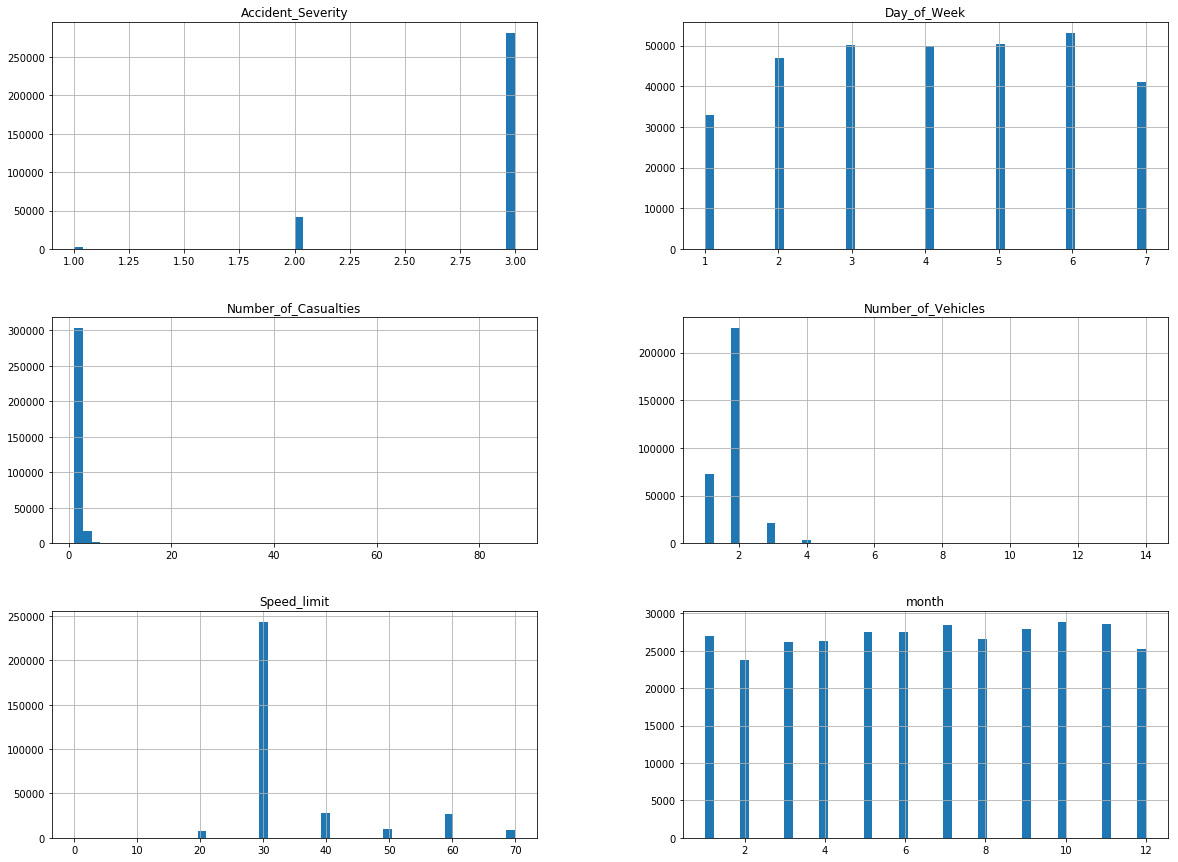

In [17]:
# Look at distributions
accidents[['Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 'month','Day_of_Week','Speed_limit']].hist(bins=50, figsize=(20,15))


<b> Interpetation: </b> <br> <br>

The mean of accident_Severity is 2.84 so a majority of the accidents are not severe.  </br>

Day of the week is almost normally distributed.  </br>

Number of casualities is skewed left with mode  of 1. </br>

The median of the number of vechicle involved is 2. </br>

There are outliers for number of casualities and vechicle but they don't really affect the statistics measures.

Speed limit has mode of 30 and the others are way less. Could be interesting to know the why accidents occured for this speed limit. </br>

The month are between 25000 and 35000 for each month.


# 5 & 6. Visualizations

## Time Series Analysis

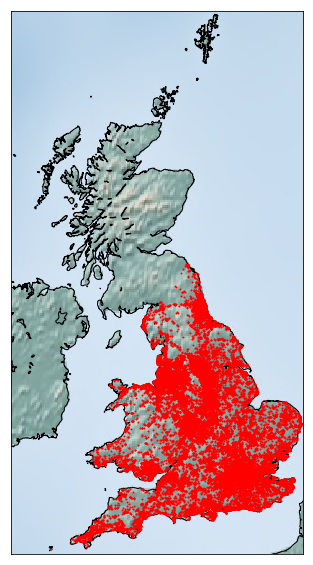

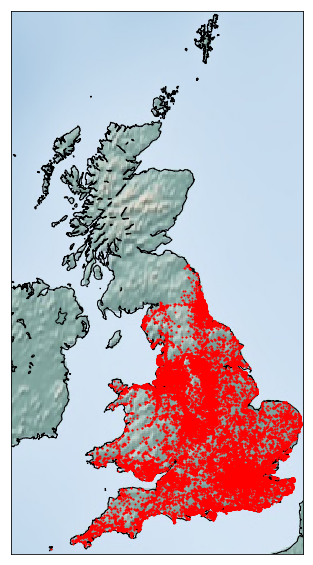

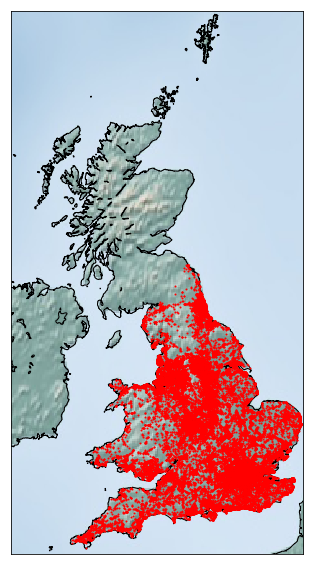

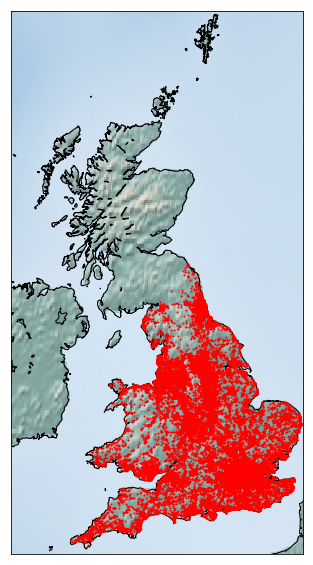

In [18]:
# This for loop goes through and plots the lat and lon for the accidents
for i in accidents['Year'].value_counts().sort_index().index:

    lon=[]
    lat=[]

    # Append the lat and lon to the list
    for x in accidents[accidents['Year'] == i].Longitude: lon.append(x)  
    for x in accidents[accidents['Year'] == i].Latitude: lat.append(x)

    
    fig, ax = plt.subplots(figsize=(10,10))

    # plot the map
    m = Basemap(llcrnrlon=-7.5600,llcrnrlat=49.7600,
                urcrnrlon=2.7800,urcrnrlat=60.840,
                resolution='f',
                projection='cass',
                lon_0=-4.36,lat_0=54.7,
                epsg=27700)

    m.shadedrelief()

    m.drawcoastlines() 
     
    #plot the points
    x,y = m(lon, lat)
    m.plot(x, y, 'ro', markersize=1) 


    plt.show()

[Text(0, 0.5, 'Counts'), Text(0.5, 0, 'Year')]

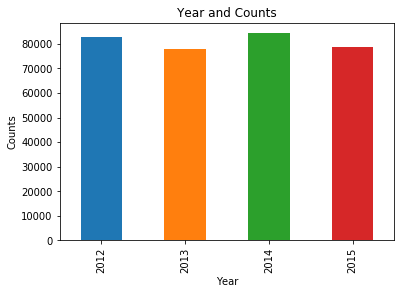

In [19]:
# plot year and counts
ax = accidents['Year'].value_counts().sort_index().plot.bar(title='Year and Counts')
ax.set(xlabel='Year', ylabel='Counts')


<b> Interpetation: </b> <br> <br> Comparing the year and the counts tells us if the number of accident has increased from 2012-2014. The second visualization shows that accidents have risen from 2012 to 2014. But looking at the first visualization with the plots, we can see on the map. the top was not recorded so accidents have not dramatically increased.

## Map Plot Of Severity

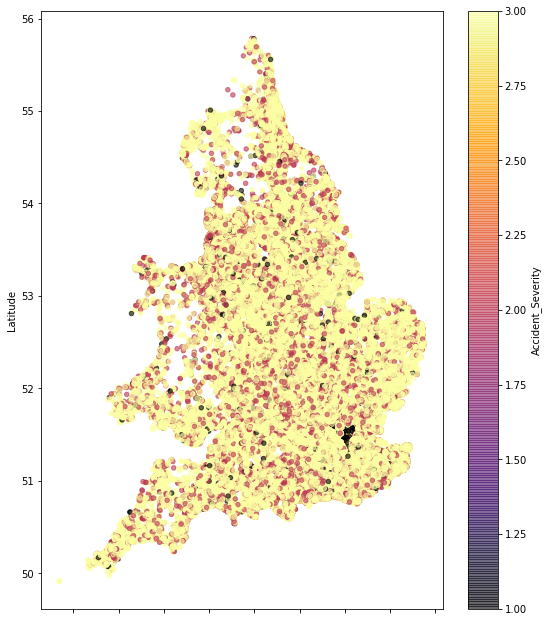

In [20]:
#plot lat and lon and label the accident severity
ax = accidents.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.6,
                   c="Accident_Severity", cmap=plt.get_cmap("inferno"), figsize=(9,11), 
                   colorbar=True,)


<b> Interpetation: </b> <br> <br> Mapping Latitude and Longitude with accident severity might tell us areas that have low, medium, and high severity. After mapping the coordinates and severity, the graph tells us that area is not an important feature that tells us about the severity of the accident. Therefore, severity might be influenced by other factors. 

## Looking at the Months

Text(0, 0.5, 'Counts')

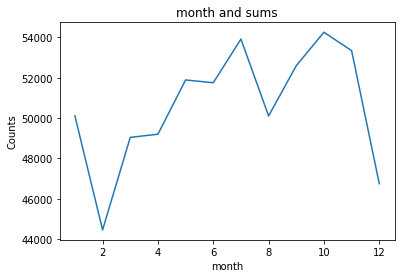

In [21]:
#plot months and the counts
ax = accidents.groupby(['month']).Number_of_Vehicles.sum().plot(kind='line', title='month and sums')
ax.set_ylabel("Counts")

<b> Interpetation: </b> <br> <br> Since the months don't vary much (count-wise). I decided to look at the number of vechicles involved with the month  to see if there would be different amount of vechicles involved in an accident. From the vizualization, the winter (12-2), we can see that there are less vechicles involved in accidents and that other factors are involved.

Text(0, 0.5, 'Average Accident Severity')

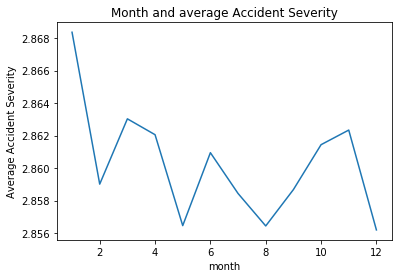

In [22]:
# Plot month and Accident Severity
ax = accidents.groupby(['month']).Accident_Severity.mean().plot(kind='line', title='Month and average Accident Severity')
ax.set_ylabel("Average Accident Severity")

<b> Interpetation: </b> <br> <br> The months could tell us if there would the severity of the accidents. Comparing both fields, we can see that the winter is the least severe while the summer is the most severe. Driver might be more cautious during the winter than the summer. I take a look at weather conditions and the severity in another visualization.

## Looking at Speed Limit 

[Text(0, 0.5, 'Counts'), Text(0.5, 0, 'Speed Limit')]

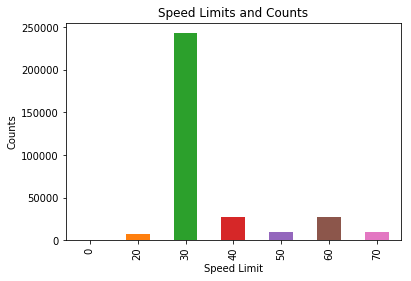

In [23]:
# Plot Speed Limit and Counts
ax = accidents['Speed_limit'].value_counts().sort_index().plot.bar(title='Speed Limits and Counts')
ax.set(xlabel='Speed Limit', ylabel='Counts')


Text(0, 0.5, 'Average Accident Severity')

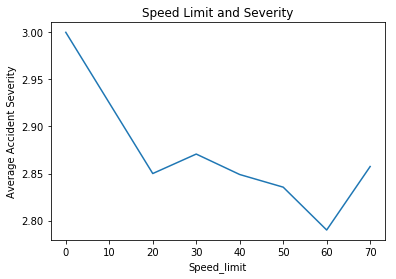

In [24]:
# Plot Speed Limit and Average Accident Severity
ax = accidents.groupby(['Speed_limit']).Accident_Severity.mean().plot(kind='line', title='Speed Limit and Severity')
ax.set_ylabel("Average Accident Severity")

<b> Interpetation: </b> <br> <br> For this visualization, I graphed the speed limit and the average accident severity. The Graph of these two attributes shows that the average accident severity is more severe for the middle speeds. 

## Number of Casualties

[Text(0, 0.5, 'Counts'), Text(0.5, 0, 'Number of Causalties')]

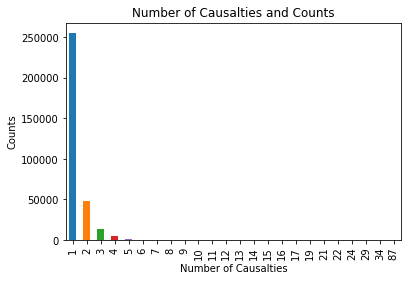

In [25]:
# Plot Number of Causalties and Counts
ax = accidents['Number_of_Casualties'].value_counts().sort_index().plot.bar(title="Number of Causalties and Counts")
ax.set(xlabel='Number of Causalties', ylabel='Counts')

Text(0, 0.5, 'Average Accident Severity')

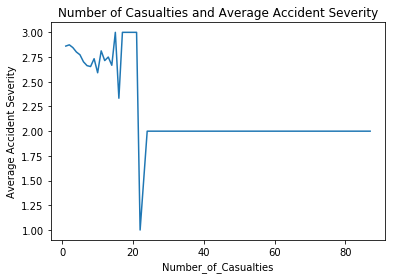

In [26]:
# Plot Number of Causalties and Average Accident Severity
ax = accidents.groupby(['Number_of_Casualties']).Accident_Severity.mean().plot(kind='line', title='Number of Casualties and Average Accident Severity')
ax.set_ylabel("Average Accident Severity")

Text(0, 0.5, 'Average Accident Severity')

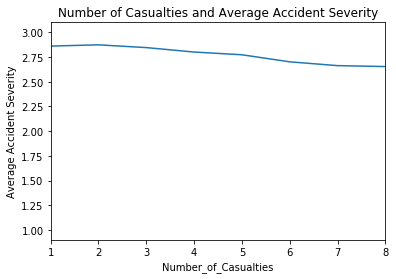

In [27]:
# Plot Number of Causalties and Average Accident Severity
ax = accidents.groupby(['Number_of_Casualties']).Accident_Severity.mean().plot(kind='line', xlim=(1,8),  title='Number of Casualties and Average Accident Severity')
ax.set_ylabel("Average Accident Severity")

<b> Interpetation: </b> <br> <br> For this visualization, I narrowed the Number_of_Casualities from 0 to 8 because the larger casualities are very limited because they don't happen frequently. I based this on records that had more than 1000 rows. But looking at the casualities from 0 to 8, we can see that when there are more casualties, the accidents are more severe. 

## Light Conditions

[Text(0, 0.5, 'Accident_Severity'), Text(0.5, 0, 'Light Conditions')]

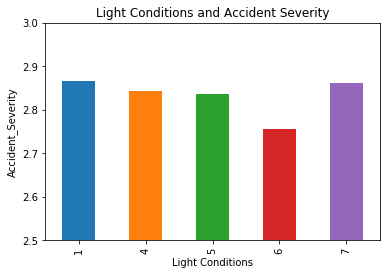

In [28]:
# Plot Light Conditions and Average Accident Severity
ax = accidents.groupby(['Light_Conditions']).Accident_Severity.mean().plot(kind='bar', ylim=(2.5,3), title='Light Conditions and Accident Severity')
ax.set(xlabel='Light Conditions', ylabel='Accident_Severity')

<table>
<tr>
    <th> code	</th>
    <th> label </th>
</tr>
<tr> 
    
<td> 1	 </td>
<td> Daylight </td>
</tr>
<tr>
    <td> 4	</td>
    <td> Darkness - lights lit </td>
</tr>
<tr>
    <td> 5 </td>	
    <td> Darkness - lights unlit </td>
<tr>
    <td> 6	</td>
    <td> Darkness - no lighting </td>
</tr>
<tr>
    <td> 7 </td>
    <td> Darkness - lighting unknown </td>
</tr>
</table>

<b> Interpetation: </b> <br> <br> For this visualization, I looked at the the light conditions and the average accident severity to see if light conditions affect the severity of the accident. From this visualization, when there is not street lighting, the severity of the accident is much higher than when there is lighting.

## Weather Condition and Severity

In [29]:
WN = pd.DataFrame(accidents.groupby(['Road_Surface_Conditions']).Accident_Severity.mean().reset_index())

[Text(0, 0.5, 'Accident_Severity')]

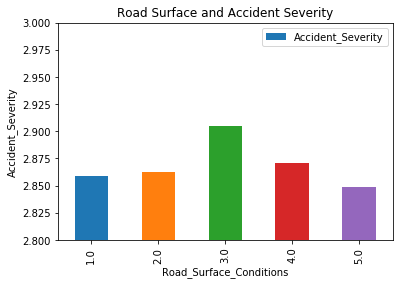

In [30]:
# Plot Road Surface and Average Accident Severity
ax = WN.plot(x='Road_Surface_Conditions', y='Accident_Severity', kind='bar', ylim=(2.8,3), title='Road Surface and Accident Severity')
ax.set(ylabel='Accident_Severity')

<b> Interpetation: </b> <br> <br> For this visualization, I looked at the the road suface conditions and the average accident severity to see if weather conditions affect the severity of the accident. When the weather is more severe, the accident severity is less severe. This shows that people are more cautious when the weather is severe. 

# 7. Important Features

From doing the analysis with the features, I think the most important features when looking at Accident Severity are month, speed limit, Number of causualities, light conditions, road Surface Conditions. These features shows relationships and could be useful in predicting the severity in future events.    

# 8. Other Features?

I don't think there are any additional features I create from this dataset. I could obtain more weather data but outside of that these are the features I will work with.

# Final - Preparing Data

In [31]:
casualties_df = pd.read_csv('Casualties0515.csv' , error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)


In [32]:
casualties_df = casualties_df.drop_duplicates(keep=False)


In [33]:
# merge with casualties
accidents_casualties_df = pd.merge(accidents,casualties_df,left_on='Accident_Index', right_on=casualties_df.index)

In [34]:
# drop nulls
accidents_casualties_df[accidents_casualties_df == -1] = np.nan


In [35]:
# Print number of missing values in each column
for accident in accidents_casualties_df:
    value = accidents_casualties_df[accident].isnull().sum()
    if(value > 0):
        print("There are", value, " missing values in column",accident)


There are 1  missing values in column Sex_of_Casualty
There are 354  missing values in column Age_of_Casualty
There are 354  missing values in column Age_Band_of_Casualty
There are 107  missing values in column Car_Passenger
There are 15  missing values in column Bus_or_Coach_Passenger
There are 9  missing values in column Pedestrian_Road_Maintenance_Worker
There are 4973  missing values in column Casualty_Home_Area_Type


In [36]:
# Fill age with mean of age
accidents_casualties_df['Age_of_Casualty'].fillna((accidents_casualties_df['Age_of_Casualty'].mean()), inplace=True)


In [37]:
# fill age group with 7
accidents_casualties_df['Age_Band_of_Casualty'].fillna(7, inplace=True)


In [38]:
accidents_casualties_df = accidents_casualties_df.dropna(subset=['Sex_of_Casualty', 'Pedestrian_Location', 'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger', 'Pedestrian_Road_Maintenance_Worker', 'Casualty_Home_Area_Type'])



In [39]:
vehicles_df =pd.read_csv('Vehicles0515.csv', error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)

In [40]:
vehicles_df = vehicles_df.drop_duplicates(keep=False)


In [41]:
# merge with vechicles
acc_cas_veh_df =  pd.merge(accidents_casualties_df,vehicles_df,left_on='Accident_Index', right_on=vehicles_df.index)

In [42]:
acc_cas_veh_df[acc_cas_veh_df == -1] = np.nan


In [43]:
# Print number of missing values in each column
for accident in acc_cas_veh_df:
    value = acc_cas_veh_df[accident].isnull().sum()
    if(value > 0):
        print("There are", value, " missing values in column",accident)


There are 1  missing values in column Vehicle_Type
There are 1292  missing values in column Age_of_Driver
There are 1292  missing values in column Age_Band_of_Driver
There are 4623  missing values in column Engine_Capacity_(CC)
There are 4350  missing values in column Propulsion_Code
There are 5345  missing values in column Age_of_Vehicle
There are 4133  missing values in column Driver_IMD_Decile
There are 2367  missing values in column Driver_Home_Area_Type


In [44]:
acc_cas_veh_df['Age_of_Driver'].fillna((acc_cas_veh_df['Age_of_Driver'].mean()), inplace=True)


In [45]:
acc_cas_veh_df['Age_Band_of_Driver'].fillna(7, inplace=True)


In [46]:
# Print number of missing values in each column
for accident in acc_cas_veh_df:
    value = acc_cas_veh_df[accident].isnull().sum()
    if(value > 0):
        print("There are", value, " missing values in column",accident)


There are 1  missing values in column Vehicle_Type
There are 4623  missing values in column Engine_Capacity_(CC)
There are 4350  missing values in column Propulsion_Code
There are 5345  missing values in column Age_of_Vehicle
There are 4133  missing values in column Driver_IMD_Decile
There are 2367  missing values in column Driver_Home_Area_Type


In [47]:
acc_cas_veh_df = acc_cas_veh_df.dropna(subset=['Vehicle_Type', 'Towing_and_Articulation', 'Vehicle_Manoeuvre', 'Vehicle_Location-Restricted_Lane', 'Junction_Location', 'Skidding_and_Overturning', 'Vehicle_Leaving_Carriageway', '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?', 'Journey_Purpose_of_Driver'])


In [48]:
acc_cas_veh_df['Age_of_Vehicle'].fillna((acc_cas_veh_df['Age_of_Vehicle'].mean()), inplace=True)


In [49]:
acc_cas_veh_df = acc_cas_veh_df.dropna(subset=['Vehicle_Type','Engine_Capacity_(CC)', 'Propulsion_Code', 'Driver_IMD_Decile', 'Driver_Home_Area_Type'])




In [50]:
acc_cas_veh_df

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,201201BS70023,525040.0,178620.0,-0.200249,51.492652,1,2,1,1,13/01/2012,...,1,2,1,20.0,4.0,124.0,1.0,2.000000,9.0,1.0
1,201201BS70093,526380.0,178190.0,-0.181111,51.488490,1,3,2,3,26/02/2012,...,1,1,1,56.0,9.0,1997.0,2.0,3.000000,6.0,1.0
2,201201BS70093,526380.0,178190.0,-0.181111,51.488490,1,3,2,3,26/02/2012,...,1,1,1,63.0,9.0,1686.0,2.0,4.000000,9.0,1.0
3,201201BS70103,526500.0,178940.0,-0.179115,51.495204,1,3,2,4,27/02/2012,...,1,1,2,27.0,6.0,2143.0,2.0,1.000000,4.0,1.0
4,201201BS70103,526500.0,178940.0,-0.179115,51.495204,1,3,2,4,27/02/2012,...,1,6,2,85.0,11.0,1781.0,1.0,19.000000,7.0,1.0
5,201201BS70174,526270.0,177790.0,-0.182837,51.484920,1,3,1,1,04/04/2012,...,1,1,1,24.0,5.0,10518.0,2.0,1.000000,1.0,1.0
6,201201BS70186,525190.0,180420.0,-0.197451,51.508796,1,3,1,1,06/04/2012,...,1,6,1,44.0,7.0,2830.0,2.0,17.000000,10.0,1.0
7,201201BS70208,527910.0,177760.0,-0.159242,51.484282,1,3,3,4,22/04/2012,...,1,6,2,33.0,6.0,2616.0,1.0,5.000000,7.0,1.0
8,201201BS70208,527910.0,177760.0,-0.159242,51.484282,1,3,3,4,22/04/2012,...,1,6,1,33.0,6.0,1998.0,1.0,11.000000,3.0,1.0
9,201201BS70208,527910.0,177760.0,-0.159242,51.484282,1,3,3,4,22/04/2012,...,1,6,2,24.0,5.0,1198.0,1.0,8.000000,9.0,3.0


# ML - Predicting Accident Severity

<b> Choose and explain your evaluation metrics that you will use (i.e., accuracy, precision, recall, F-measure, or a mix of all of them). Why are these appropriate for analyzing the results of your modeling? </b>

I will use Precision, Recall, and F1-score and not accuracy because accuracy because my classes (Accident Severity) is not balanced and looking at accuracy will not give the full picture on the reliability of the model.

Precision: Precision is import in accident severity models, since classifying an accident that is severe as slight could say the accident is not severe and attention might not be needed.

Recall: Recall is import in accident severity models, since classifying an accident that is slight as severe could say the accident severe and attention is needed immediately.

F1-score: F1-score is a harmonic mean of precision and recall. F1 score would be ideal, since Recall also matters in the accident severity case.


<b> Choose the method you will use for dividing your data into training and testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. </b>

I am using Stratified 10 fold cross validation ( StratifiedKFold). This makes sure that class imbalances are captured for train and test splits.


In [51]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [52]:
# Set accident severity as first column
acc_cas_veh_df.insert(loc=0, column='Severity', value=acc_cas_veh_df.Accident_Severity)
acc_cas_veh_df = acc_cas_veh_df.drop(columns=['Accident_Severity'])

In [53]:
#drop unneccesary cols
acc_cas_veh_df = acc_cas_veh_df.drop(columns=['Accident_Index', 'Date', 'Time'])

In [54]:
acc_cas_veh_df = acc_cas_veh_df.drop(columns=['Longitude', 'Latitude'])

In [55]:
# encode categorical data 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

acc_cas_veh_df["Local_Authority_(Highway)"] = le.fit_transform(acc_cas_veh_df["Local_Authority_(Highway)"])
acc_cas_veh_df["LSOA_of_Accident_Location"] = le.fit_transform(acc_cas_veh_df["LSOA_of_Accident_Location"])


In [56]:
acc_cas_veh_df = acc_cas_veh_df.drop(columns=['Casualty_Severity'])

In [57]:
acc_cas_veh_df.shape

(18551, 63)

In [58]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from numpy import set_printoptions

X = acc_cas_veh_df.iloc[:,1:63]  #independent columns
Y = acc_cas_veh_df.iloc[:,0]    #target column 
# feature extraction
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


                         Specs          Score
1       Location_Northing_OSGR  366605.731140
0        Location_Easting_OSGR   99734.849331
57        Engine_Capacity_(CC)   57489.996786
25   LSOA_of_Accident_Location   38946.325800
15             2nd_Road_Number   16893.009729
6   Local_Authority_(District)   12802.138109
4         Number_of_Casualties    4829.107126
9              1st_Road_Number    4157.387488
39               Casualty_Type    2219.160228
29          Casualty_Reference    1631.494822


In [59]:
featureScores.nlargest(10,'Score').Specs.value_counts().index.values

array(['LSOA_of_Accident_Location', 'Casualty_Type',
       'Number_of_Casualties', 'Casualty_Reference', '2nd_Road_Number',
       '1st_Road_Number', 'Local_Authority_(District)',
       'Location_Northing_OSGR', 'Engine_Capacity_(CC)',
       'Location_Easting_OSGR'], dtype=object)

In [60]:
# Feature Extraction with PCA
from pandas import read_csv
from sklearn.decomposition import PCA

X = acc_cas_veh_df.iloc[:,1:63]  #independent columns
Y = acc_cas_veh_df.iloc[:,0]    #target column 
# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [7.39838339e-01 2.59598997e-01 1.77112450e-04 1.59959889e-04
 1.37525193e-04 8.72810078e-05 6.77539483e-07 4.91978447e-08
 2.32434765e-08 9.69924004e-09]
[[-2.08735121e-01  9.77968035e-01 -8.18920733e-05 -7.52017020e-08
   1.19547821e-05  2.54524767e-07 -8.15536202e-04 -1.06931575e-04
   6.61538619e-07  1.26047617e-03  2.02765358e-08 -3.48030253e-06
   3.36011605e-07 -7.11095693e-08 -8.60103049e-08  9.35900019e-04
   1.03748851e-08 -4.04317241e-07  1.14348663e-07  7.16892331e-08
   7.26815857e-08 -1.21622460e-08 -4.74118742e-08 -1.10556128e-08
   6.20558453e-09 -1.84749178e-03 -1.31663342e-07 -5.03284684e-07
  -1.63751805e-07  6.75433721e-06  1.38841772e-07  7.92293073e-08
  -8.91465971e-06 -1.05748160e-06 -5.67248413e-07 -5.97916397e-07
   3.75903456e-07  1.17434776e-06 -5.98696082e-07  2.89241128e-06
  -2.83493258e-07 -1.84215894e-08  4.08451636e-08  3.64596962e-08
   1.59184479e-06  1.47009316e-08  4.47090113e-08  4.86612001e-08
  -2.63453659e-07  7.18294787e-08 

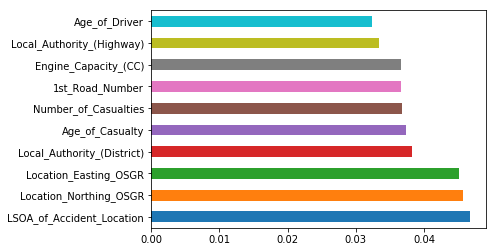

In [61]:
# Feature Importance with RandomForestClassifier
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
# feature extraction
model = RandomForestClassifier(n_estimators=100)
model.fit(X, Y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


<b> Which attributes from your analysis are most important? Why? Does it make sense? </b>

There are location attributes (LSOA, Location_Northing, Location_Easting, District) which make some sense in that severe accidents could have occurred at some location.

Number of casualties tells how many people/cars are involved. The more cars could cause a higher accident severity.

 Age could play a part in explaining the people who are driving the car. Younger/Older people are more likely to cause accidents.


In [62]:
X = acc_cas_veh_df[featureScores.nlargest(10,'Score').Specs.value_counts().index.values]


In [63]:
Y = acc_cas_veh_df.iloc[:,0]
validation_size = 0.3
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

<b> Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. </b>

Random Forest: emphasizes feature selection, utilizes ensemble learning - takes many samples, form decisions tree, and averages them.

Linear Discrimination Analysis: Assume linear

KNN:


In [64]:
# Spot-Check Algorithms
models = []
num_trees = 100
max_features = 10

models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features, class_weight="balanced")))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RF: 0.796690 (0.011807)
LDA: 0.620948 (0.003121)
KNN: 0.672160 (0.006452)


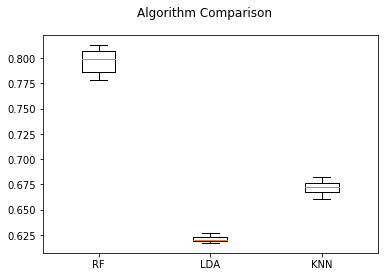

In [65]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [66]:
# Make predictions on validation dataset
LDA = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, class_weight="balanced")
LDA.fit(X_train, Y_train)
predictions = LDA.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8050664750269493
[[ 168   58  118]
 [  14 1236  594]
 [  10  291 3077]]
              precision    recall  f1-score   support

           1       0.88      0.49      0.63       344
           2       0.78      0.67      0.72      1844
           3       0.81      0.91      0.86      3378

    accuracy                           0.81      5566
   macro avg       0.82      0.69      0.74      5566
weighted avg       0.81      0.81      0.80      5566



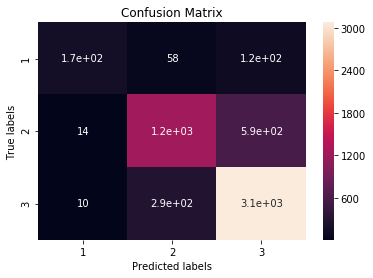

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_validation, predictions), annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '2', '3']); ax.yaxis.set_ticklabels(['1', '2', '3']);


<b> How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.? </b>

I feel my model can definitely be improved because I did not use every dataset the UK has put out.  I would measure the recall and f-1 score because those seem to be on the low end. There is one dataset with alcohol, and another with breath test so how intoxicated someone is another factor to consider. My model would need to 